In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, r_regression, mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, SplineTransformer, KBinsDiscretizer, \
     StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score, get_scorer_names, accuracy_score, f1_score, precision_score, \
     confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xg

In [2]:
df = pd.read_csv('fulvestrantTrain.tsv', sep='\t', low_memory=True)

In [3]:
df.describe()

,Fulvestrant_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.166667,0.166667,0.104167,0.104167,0.166667,0.145833,0.166667,0.125000,0.166667,0.083333,...,1.989454,3.649866,0.169535,2.245618,0.446691,0.987229,0.622126,1.054658,10.509791,0.914311
std,0.376622,0.376622,0.308709,0.308709,0.376622,0.356674,0.376622,0.334219,0.376622,0.279310,...,1.016056,2.598272,0.611275,0.866488,0.577040,0.702078,0.430358,0.463828,2.273620,0.674039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.144895,0.000000,0.000000,0.000000,0.166925,3.829951,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.330255,0.648218,0.000000,1.684892,0.106558,0.443859,0.289601,0.702650,9.159831,0.437657
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.133274,4.071466,0.000000,2.334070,0.183084,0.923775,0.543560,1.038418,11.387891,0.890495
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.806121,6.081639,0.074701,2.856424,0.471352,1.414979,0.839956,1.376191,12.097373,1.168868
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.920169,7.317910,4.135280,3.841108,2.252961,2.339186,1.788611,2.375384,13.777173,2.762691


In [4]:
df.head()

,Fulvestrant_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,1,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,0,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,1,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,1,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


In [5]:
df.describe(include=[np.int64])

,Fulvestrant_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_AHSP,rna_MIR212,rna_MIR636,rna_MIR5196,rna_MIR330,rna_MIR6807,rna_SNORA71D,rna_P2RX6P,rna_SNORD83B,rna_SNORA11E
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
mean,0.166667,0.166667,0.104167,0.104167,0.166667,0.145833,0.166667,0.125000,0.166667,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.376622,0.376622,0.308709,0.308709,0.376622,0.356674,0.376622,0.334219,0.376622,0.279310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['rna_MIR6728',
 'rna_MIR6084',
 'rna_RNVU1-20',
 'rna_MIR568',
 'rna_MIR7110',
 'rna_HTN3',
 'rna_GYPB',
 'rna_SNORA29',
 'rna_MIR7-1',
 'rna_MIR455',
 'rna_SNORA70C',
 'rna_MIR5699',
 'rna_SNORA19',
 'rna_HBBP1',
 'rna_MIR7851',
 'rna_SNORA34',
 'rna_SNORA2B',
 'rna_AHSP',
 'rna_MIR212',
 'rna_MIR636',
 'rna_MIR5196',
 'rna_MIR330',
 'rna_MIR6807',
 'rna_SNORA71D',
 'rna_P2RX6P',
 'rna_SNORD83B',
 'rna_SNORA11E']

In [7]:
df.rna_AHSP.value_counts()

0    48
Name: rna_AHSP, dtype: int64

<Axes: ylabel='Frequency'>

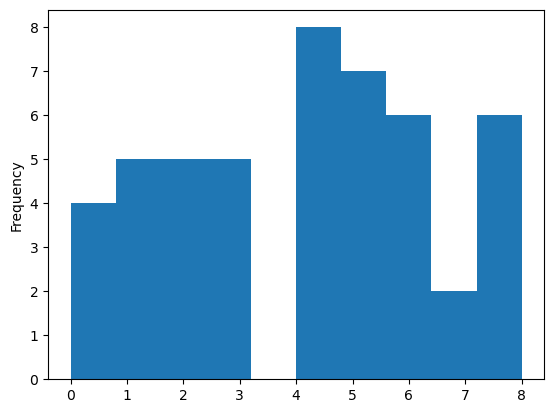

In [8]:
enc = OrdinalEncoder()
df.type = enc.fit_transform(df.type.values.reshape(-1,1))
df.type.plot(kind='hist')

In [9]:
features = df.drop(columns=['Fulvestrant_response']+constant_columns, axis=1)
label = df.Fulvestrant_response
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, shuffle=True, stratify=label, random_state=20)

<Axes: ylabel='Frequency'>

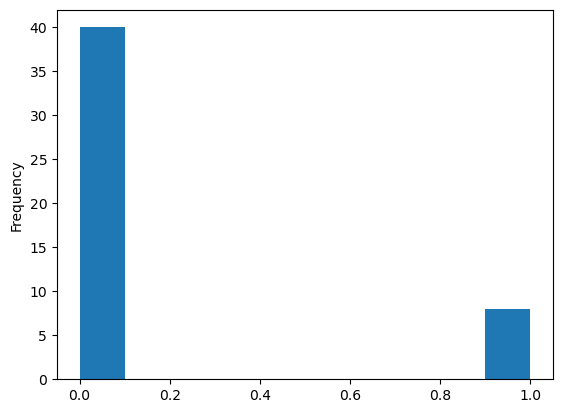

In [10]:
label.plot(kind='hist')

<Axes: ylabel='Frequency'>

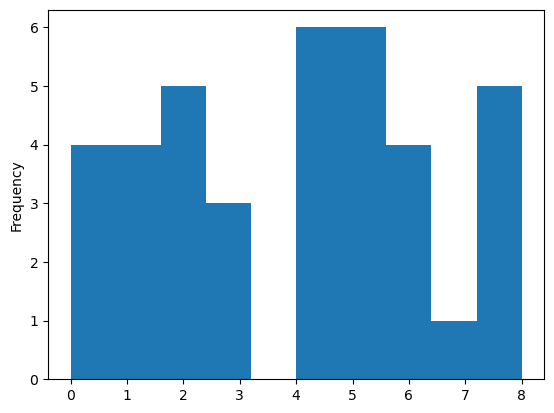

In [125]:
X_train.type.plot(kind='hist')

<Axes: ylabel='Frequency'>

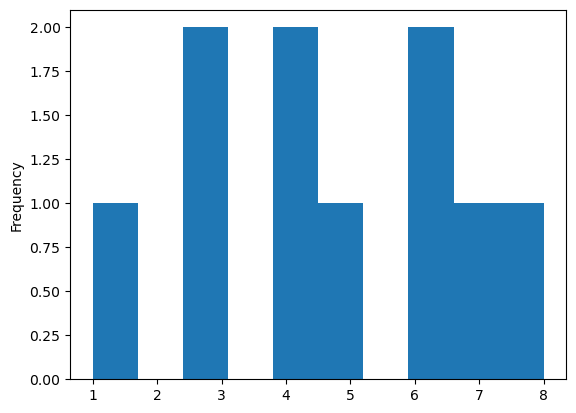

In [126]:
X_test.type.plot(kind='hist')

In [31]:
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

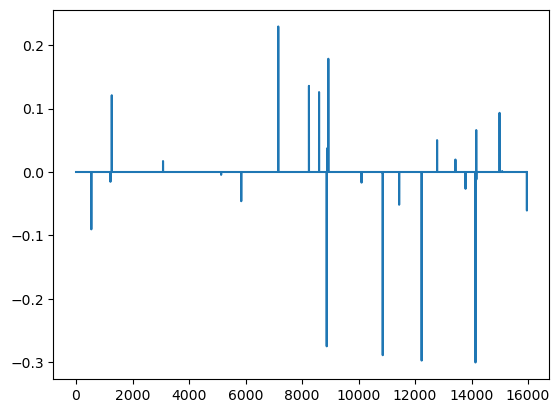

In [33]:
feat_imp = model.coef_.reshape(-1)
feat_names = model.feature_names_in_
imp_feats = {feat_names[i]:imp for i, imp in enumerate(feat_imp) if imp != 0}
plt.plot(feat_imp)

In [34]:
imp_feats, len(imp_feats)

({'rna_RNU11': -0.09052055143550489,
  'rna_S100A4': -0.015499891429453214,
  'rna_S100A6': -0.0012103729027334172,
  'rna_MUC1': 0.12117176343480143,
  'rna_SEMA3F': 0.017277753681115254,
  'rna_HIST1H3J': -0.004521443188427951,
  'rna_AGR2': -0.04609474421085352,
  'rna_CDKN2A': 0.22973932110159162,
  'rna_GFRA1': 0.13598912017791062,
  'rna_MDK': 0.12616223979908878,
  'rna_GSTP1': -0.27521305523141737,
  'rna_GAL': 0.03750055117338043,
  'rna_UCP2': 0.17877517714857652,
  'rna_RPL21P28': -0.01679767354619053,
  'rna_CRIP1': -0.0006759412788619599,
  'rna_SNURF': -0.28923450581962107,
  'rna_SNORA10': -0.05170560908595689,
  'rna_SNORD10': -0.29770524734372805,
  'rna_SNORD104': 0.0503044475008365,
  'rna_CTXN1': 0.01967892780143643,
  'rna_FXYD5': -0.026542874978096542,
  'rna_RPL13AP5': -0.30071571712040873,
  'rna_IL4I1': 0.06619460679466155,
  'rna_EMC10': -0.011720871563396035,
  'rna_MIR3198-1': 0.09339362648217708,
  'rna_MIF': 0.0014663521494833634,
  'rna_RNA5-8S5': -0.0608

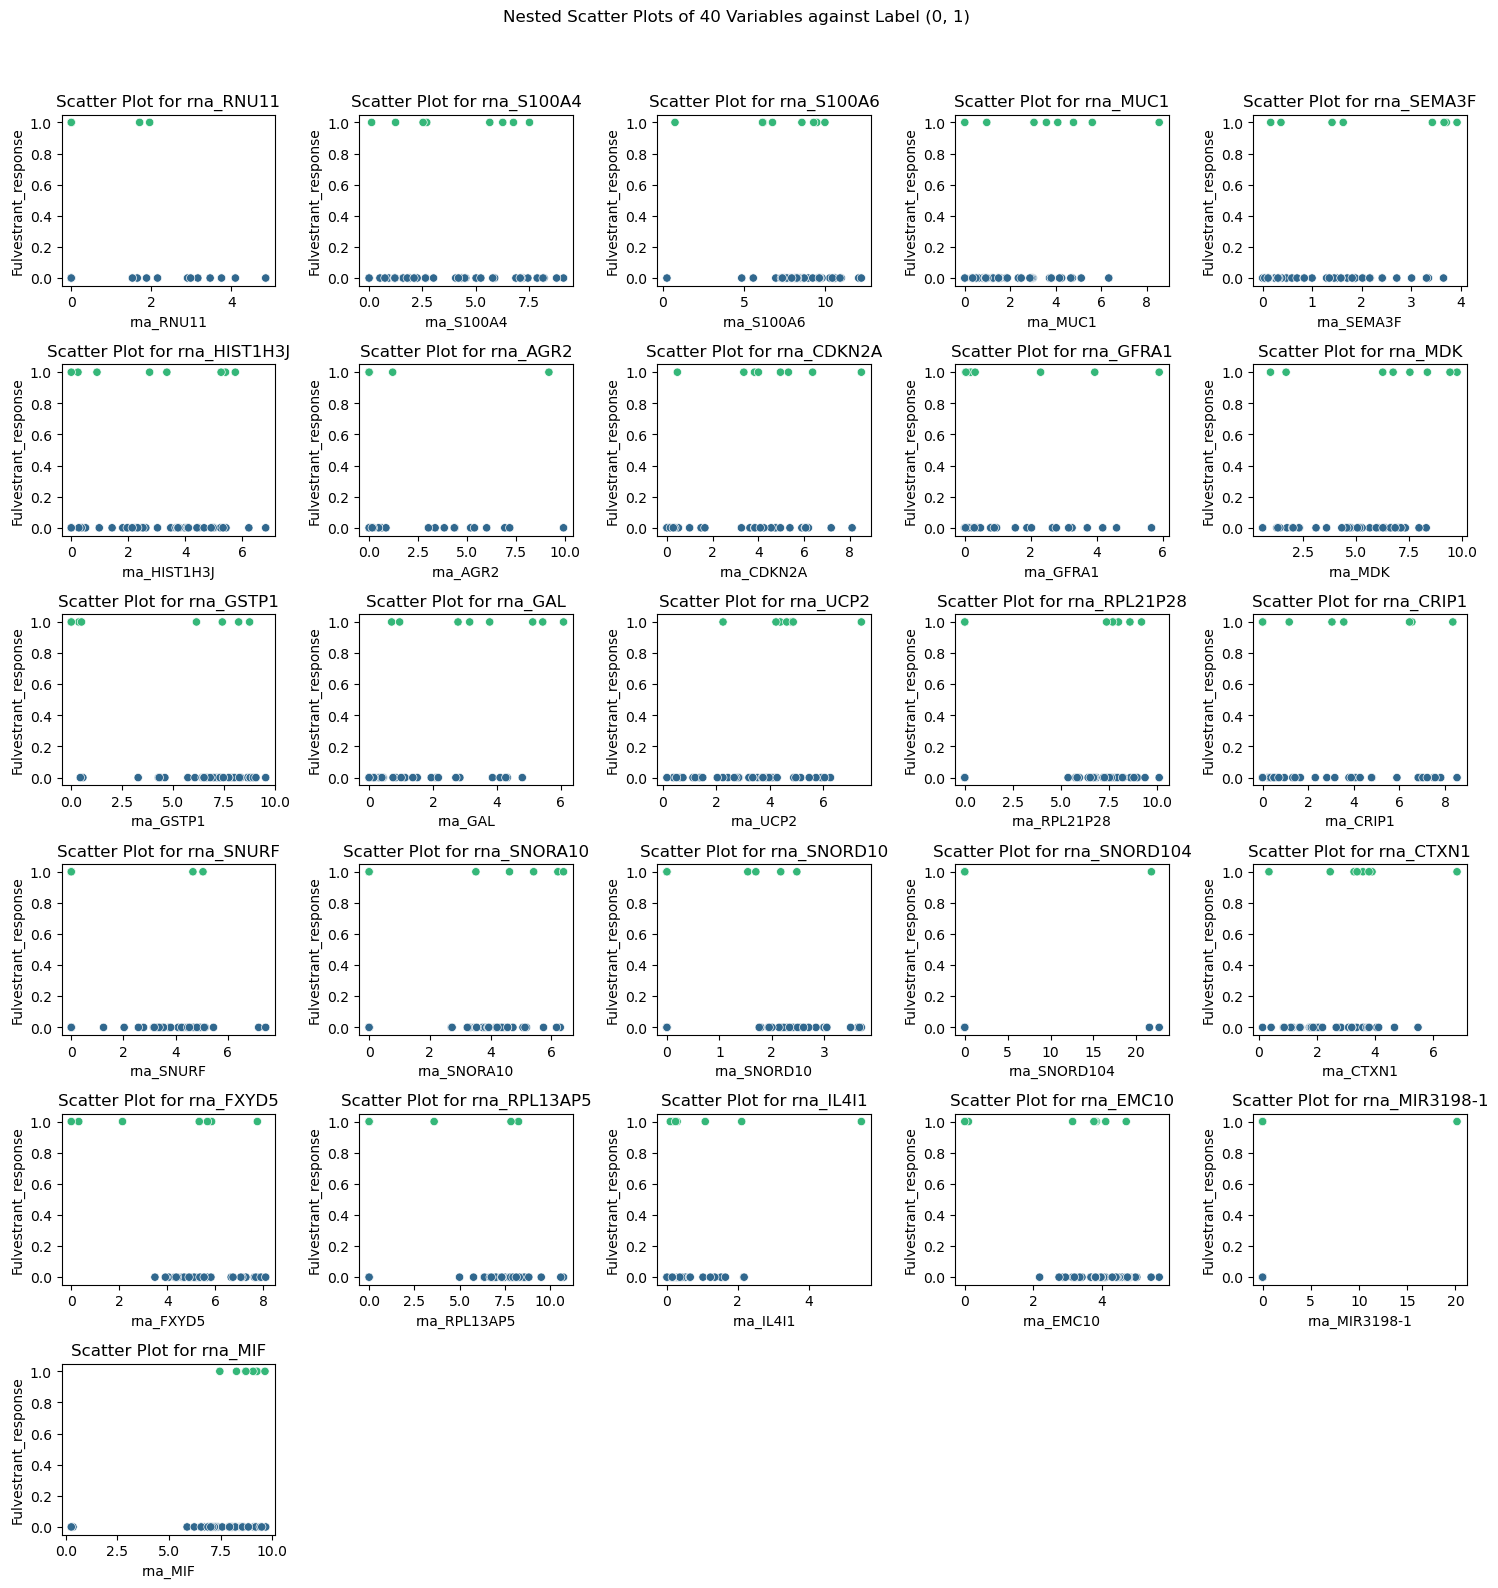

In [35]:
# Set up the figure and axes
fig, axes = plt.subplots(8, 5, figsize=(15, 20))
fig.suptitle('Nested Scatter Plots of 40 Variables against Label (0, 1)', y=1.02)

# Flatten the axes for iteration
axes = axes.flatten()

# Use a for loop to create scatter plots
for i, variable in enumerate(list(imp_feats.keys())):
    sns.scatterplot(data=features,x=variable, y=label, ax=axes[i], hue=label, palette='viridis', legend=False)
    axes[i].set_title(f'Scatter Plot for {variable}')

# Remove empty subplots
for j in range(len(list(imp_feats.keys())) - 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

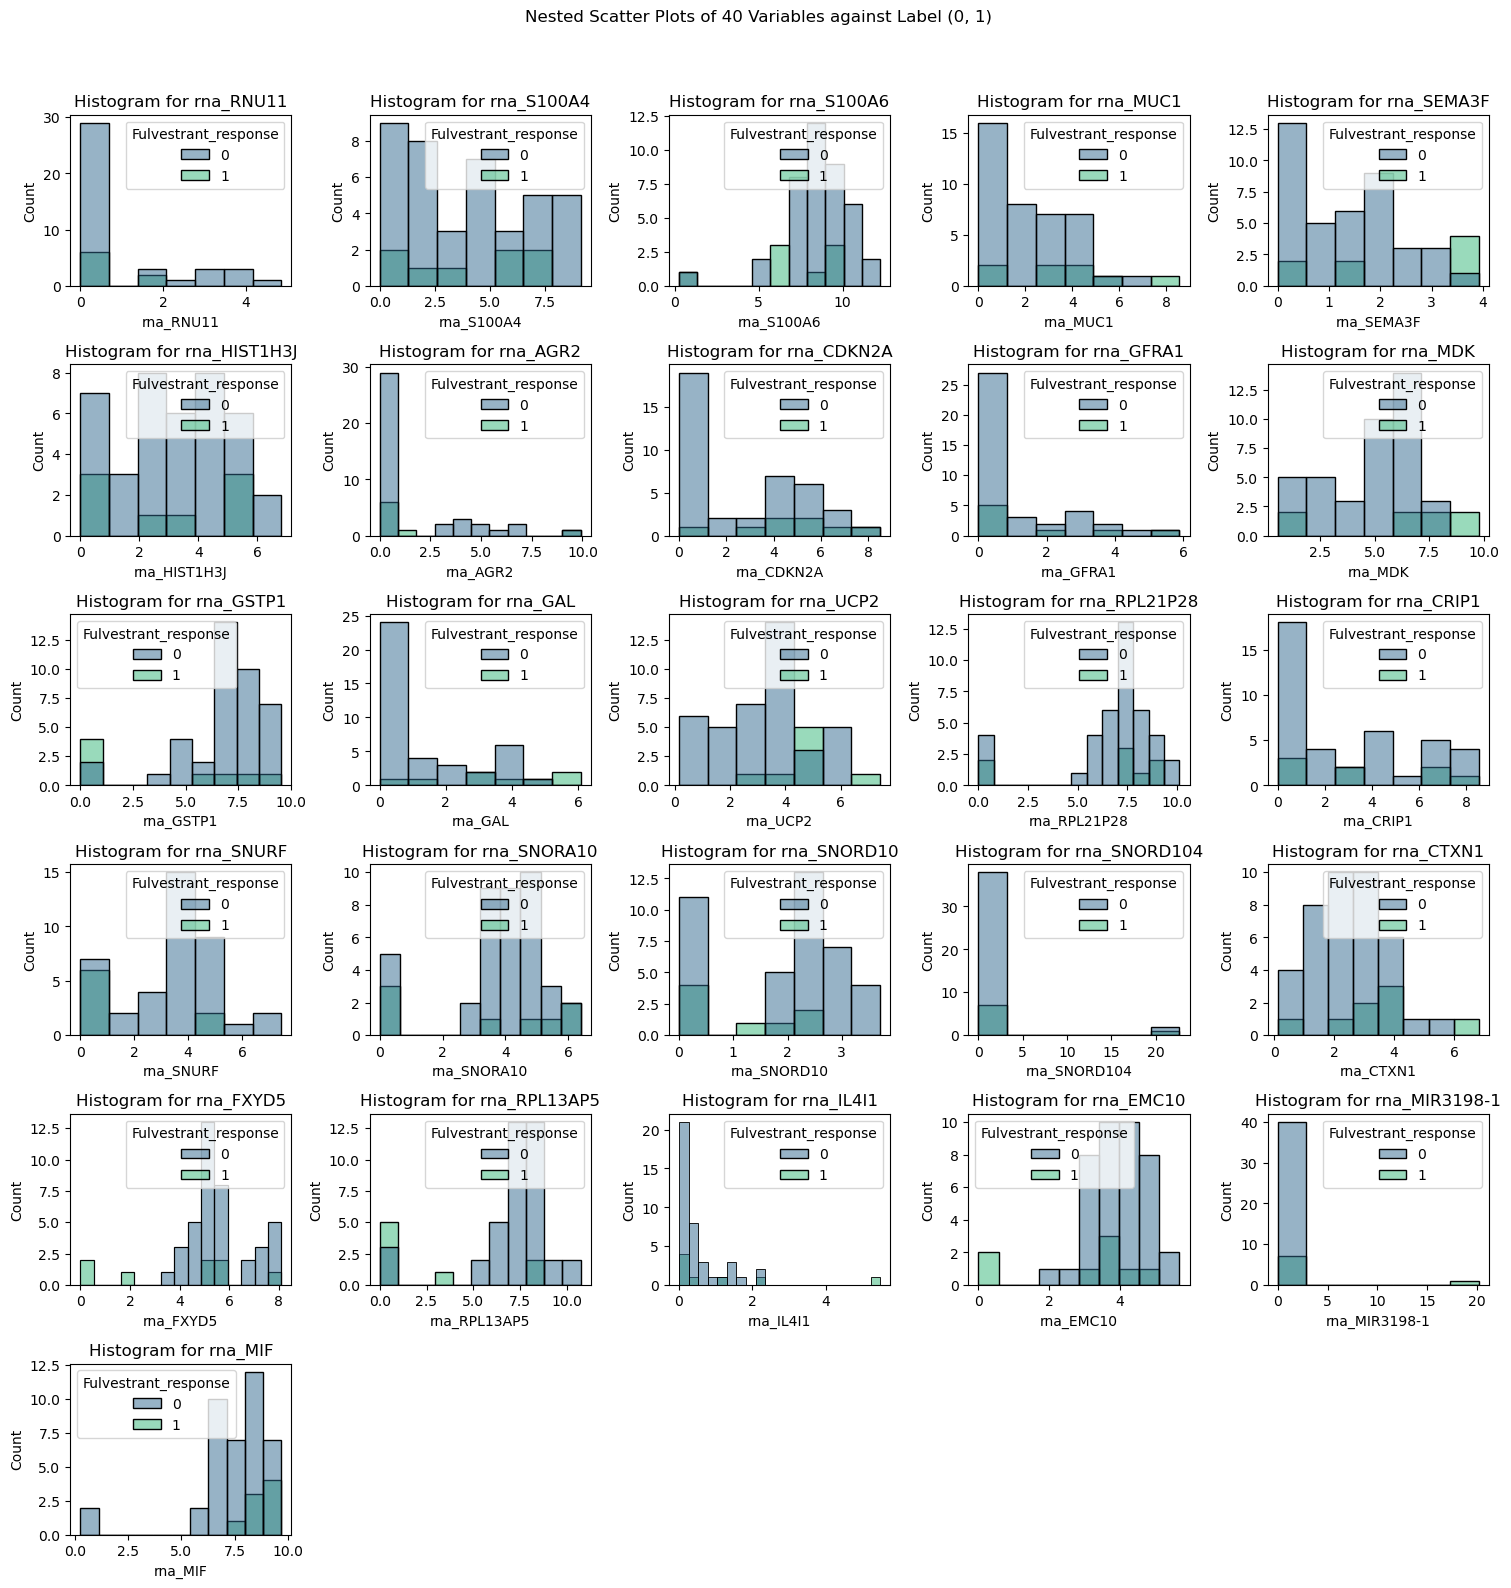

In [36]:
# Set up the figure and axes
fig, axes = plt.subplots(8, 5, figsize=(15, 20))
fig.suptitle('Nested Scatter Plots of 40 Variables against Label (0, 1)', y=1.02)

# Flatten the axes for iteration
axes = axes.flatten()

# Use a for loop to create scatter plots
for i, variable in enumerate(list(imp_feats.keys())):
    sns.histplot(data=features,x=variable, ax=axes[i], hue=label, palette='viridis', legend=True)
    axes[i].set_title(f'Histogram for {variable}')

# Remove empty subplots
for j in range(len(list(imp_feats.keys())) - 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [116]:
numeric_transformer = Pipeline([
      ('bin', KBinsDiscretizer(encode='ordinal', strategy='kmeans')), #only improved Lars
      # ('select_feats', SelectKBest(f_regression, k='all'))
])
categorical_transformer = Pipeline([
      ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

In [117]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features.columns),
    ]
)

In [37]:
lr_params={
    'fit_intercept':True,
    'C':1.0,
    'solver':'liblinear',
    'penalty': 'l1',
    'random_state':42
}

In [38]:
pipe_lr = Pipeline([
    # ('prep', preprocessor),
    ('lr', LogisticRegression(**lr_params,max_iter=1000))
])
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'lr', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__l1_ratio', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [139]:
import itertools

def union_lists(*lists):
    concatenated_list = list(itertools.chain(*lists))
    unique_set = set(concatenated_list)     
    final_union = list(unique_set)
    return final_union

def select_features(est,features, label):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=120)
    imp_feats_2 = []
    bas = []
    f1 = []
    for train_idx, val_idx in cv.split(features, label):
        imp_feats_ = pd.DataFrame()
        X, y = features.iloc[train_idx], label[train_idx]
        Xval, yval = features.iloc[val_idx], label[val_idx]
        est.fit(X,y)
        pred = est.predict(Xval)
        bas.append(balanced_accuracy_score(yval, pred))
        f1.append(f1_score(yval, pred, average='weighted'))
        try:
            feat_imp = est.coef_.reshape(-1)
        except:
            feat_imp = est.feature_importances_
        try:
            feat_names = est.feature_names_in_
        except:
            feat_names = est.feature_name_
        feats_ = {feat_names[i]:imp for i, imp in enumerate(feat_imp) if imp != 0}
        imp_feats_['feats'] = list(feats_.keys())
        imp_feats_['imps'] = list(feats_.values())
        imp_feats_.sort_values('imps', inplace=True, ignore_index=True, ascending=False)
        imp_feats_2.append(imp_feats_)

    # feats_list = [list(feats.keys()) for feats in feats_cv]
    topf = pd.concat(imp_feats_2, axis=0, ignore_index=True)
    topf = topf.groupby('feats')['imps'].apply(sum).sort_values(ascending=False).index.to_list()
    print(f'Balanced Accuracy cv: ' + str(np.nanmean(bas)))
    print(f'accuracy cv std: ' + str(np.nanstd(bas)))
    print(f'F1 cv: ' + str(np.nanmean(f1)))
    print(f'F1 cv std: ' + str(np.nanstd(f1)))
    return topf, topf[0]

def run_test(model, imp_feats):
    model.fit(X_train[imp_feats], y_train)
    pred = model.predict(X_test[imp_feats])
    bas = balanced_accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')
    print(f"--------------{model.__class__.__name__}-------------")
    print(f'Balanced Accuracy test: {bas}')
    print(f'F1 test: {f1}')


In [145]:
lr = LogisticRegression(**lr_params, max_iter=1000)
svm = SVC(probability=True)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
lgbm = lgb.LGBMClassifier()
xgb = xg.XGBClassifier()
vcs = VotingClassifier(estimators=[('svc', svm), ('rf', rf), ('xgb', xgb)], voting='hard')
vch = VotingClassifier(estimators=[('svc', svm), ('rf', rf), ('xgb', xgb)], voting='soft')

In [129]:
imp_feats_lr, topf_lr = select_features(lr, X_train, y_train)

Balanced Accuracy cv: 0.6333333333333334
accuracy cv std: 0.19436506316151003
F1 cv: 0.8298168498168497
F1 cv std: 0.08773497115380635


In [130]:
imp_feats_rf, topf_rf = select_features(rf, X_train, y_train)

Balanced Accuracy cv: 0.4833333333333334
accuracy cv std: 0.033333333333333326
F1 cv: 0.7585347985347985
F1 cv std: 0.0915168019614929


In [131]:
imp_feats_xgb, topf_xgb = select_features(xgb, X_train, y_train)

Balanced Accuracy cv: 0.4833333333333334
accuracy cv std: 0.033333333333333326
F1 cv: 0.7585347985347985
F1 cv std: 0.0915168019614929


In [146]:
models = [lr, svm, rf, lgbm, xgb, vcs, vch]
feats = {'lr': imp_feats_lr, 'rf': imp_feats_rf, 'xgb': imp_feats_xgb}
for name, feat in feats.items():
    print(f'features identified using {name}')
    for model in models:
        run_test(model, feat)
    print("-----------------")

features identified using lr
--------------LogisticRegression-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
--------------SVC-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
--------------RandomForestClassifier-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
--------------LGBMClassifier-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
--------------XGBClassifier-------------
Balanced Accuracy test: 0.4375
F1 test: 0.6588235294117648
--------------VotingClassifier-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
--------------VotingClassifier-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
-------------
features identified using rf
--------------LogisticRegression-------------
Balanced Accuracy test: 0.6875
F1 test: 0.8
--------------SVC-------------
Balanced Accuracy test: 0.5
F1 test: 0.7111111111111111
--------------RandomForestClassifier-------------
Balanced